In [14]:
from __future__ import annotations
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from util_funcs import calculate_prevalence
from util_funcs import calculate_ci
from util_funcs import calculate_relrisk
from util_funcs import select_valid

warnings.filterwarnings('ignore')
%matplotlib inline
%load_ext autoreload
%autoreload 2

pd.options.display.float_format = "{:,.3f}".format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# load to dataframe
INFILE = '/home/grace/work/SEER/data/SEERPLUS_2010_2020.clean.tsv'
master = pd.read_csv(INFILE, header=0, sep='\t', na_values='.')
master.head()

,patient_id,patient_death_year,diagnosis_year,followup_year,diagnosis_agebin,cancer_type,cancer_group,primary_type,primary_group,t_stage_ajcc,n_stage_ajcc,g_stage_ajcc,t_stage_src,n_stage_src,g_stage_src,grade,grade_src,regional_nodes,regional_nodes_examined,regional_nodes_positive,behavior,num_malignant_tumors,num_benign_tumors,psa,breast_subtype,hist_type,hist_cateogry,brain_met,bone_met,lung_met,liver_met,other_met,distant_ln
0,108,NaN,2015,2020,75-79 years,Vulva,Vulva,Vulva,Vulva,Tis,N0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,BENIGN,2,0,NaN,NaN,8542,8500-8549: ductal and lobular neoplasms,False,False,False,False,NaN,NaN
1,137,"2,017.000",2012,2017,85-89 years,Myeloma,Leukemia,Myeloma,Leukemia,NaN,NaN,NaN,NaN,NaN,NaN,T_CELL,NaN,NaN,NaN,NaN,MALIGNANT,2,0,NaN,NaN,9732,9730-9739: plasma cell tumors,NaN,NaN,NaN,NaN,NaN,NaN
2,139,"2,011.000",2003,2011,60-64 years,NHL - Extranodal,Non-Hodgkin Lymphoma,Lung and Bronchus,Lung and Bronchus,NaN,NaN,NaN,NaN,NaN,NaN,T_CELL,NaN,NaN,NaN,NaN,MALIGNANT,3,0,NaN,NaN,9699,9670-9699: nhl - mature b-cell lymphomas,NaN,NaN,NaN,NaN,NaN,NaN
3,139,"2,011.000",2007,2011,65-69 years,Breast,Breast,Breast,Breast,Tis,N0,0,NaN,NaN,NaN,G3,NaN,NaN,0.000,NaN,BENIGN,3,0,NaN,NaN,8010,"8010-8049: epithelial neoplasms, NOS",NaN,NaN,NaN,NaN,NaN,NaN
4,139,"2,011.000",2010,2011,70-74 years,Breast,Breast,Breast,Breast,T3,N0,IIB,NaN,NaN,NaN,G3,NaN,NEG,3.000,0.000,MALIGNANT,3,0,NaN,HR-/HER2-,8500,8500-8549: ductal and lobular neoplasms,False,False,False,False,NaN,NaN


In [16]:

from util_funcs import do_basic_filtering
from util_funcs import do_basic_formatting
from util_funcs import remove_identical_primary_secondary_cases
from util_funcs import format_ln_status

print('\nFiltering')
maintable = do_basic_filtering(master.copy())
maintable = remove_identical_primary_secondary_cases(maintable)

print('\nFormatting')
maintable = do_basic_formatting(maintable)
maintable = format_ln_status(maintable, basis='pathological')
# maintable = format_ln_status(maintable, basis='clinical')

maintable.head()


Filtering
Reginning records: 5604583
Removing records not in range (2010, 2020)... removed 371509 records
Removing records with non 'MALIGNANT' behavior... removed 632160 records
Handling patients with multiple records of same cancer_type... removed 82397 records

Final records: 4518517, patients: 4238366
Removing MET records where primary tissue is identical to secondary tissue
- removed 69806 records

Formatting
Missing 0 codes.
Formatting cancer subtypes
TNG, Grade standardisation
formatting ln_status


,patient_id,patient_death_year,diagnosis_year,followup_year,diagnosis_agebin,cancer_type,cancer_group,primary_type,primary_group,t_stage_ajcc,n_stage_ajcc,g_stage_ajcc,t_stage_src,n_stage_src,g_stage_src,grade,grade_src,regional_nodes,regional_nodes_examined,regional_nodes_positive,behavior,num_malignant_tumors,num_benign_tumors,psa,breast_subtype,hist_type,hist_cateogry,brain_met,bone_met,lung_met,liver_met,other_met,distant_ln,any_met,hist_group,hist_type_descr,TSTAGE_STD,NSTAGE_STD,GSTAGE_STD,GRADE_STD,local_ln
4,139,"2,011.000",2010,2011,70-74 years,Breast,Breast,Breast,Breast,T3,N0,IIB,NaN,NaN,NaN,G3,NaN,NEG,3.000,0.000,MALIGNANT,3,0,NaN,HR-/HER2-,8500,ductal and lobular neoplasms,NO,NO,NO,NO,NaN,NaN,NO,ductal and lobular neoplasms,Infiltrating duct carcinoma [+ others],T3,N0,II,G3,False
5,142,NaN,2018,2020,70-74 years,Breast,Breast,Breast,Breast,T2,N0,IIA,NaN,NaN,NaN,G3,P,NEG,3.000,0.000,MALIGNANT,2,0,NaN,HR-/HER2-,8500,ductal and lobular neoplasms,NO,NO,NO,NO,NO,False,NO,ductal and lobular neoplasms,Infiltrating duct carcinoma [+ others],T2,N0,II,G3,False
6,194,NaN,2016,2020,55-59 years,Ovary,Ovary,Ovary,Ovary,T1c,N0,IC,P,P,NaN,G2,NaN,NEG,10.000,0.000,MALIGNANT,2,0,NaN,NaN,8441,"cystic, mucinous and serous neoplasms",NO,NO,NO,NO,NO,False,NO,"cystic, mucinous and serous neoplasms",Serous carcinoma [+ others],T1,N0,I,G2,False
7,220,NaN,2011,2020,70-74 years,Prostate,Prostate,Prostate,Prostate,T1c,N0,II,NaN,NaN,NaN,G2,NaN,NaN,0.000,NaN,MALIGNANT,2,0,6.600,NaN,8140,adenomas and adenocarcinomas,NO,NO,NO,NO,NaN,NaN,NO,adenomas and adenocarcinomas,Adenoma [+ others],T1,N0,II,G2,NaN
8,265,"2,016.000",2011,2016,65-69 years,Prostate,Prostate,Prostate,Prostate,T2c,N0,II,NaN,NaN,NaN,G3,NaN,NaN,0.000,NaN,MALIGNANT,2,0,7.700,NaN,8140,adenomas and adenocarcinomas,NO,NO,NO,NO,NaN,NaN,NO,adenomas and adenocarcinomas,Adenoma [+ others],T2,N0,II,G3,NaN


In [34]:
### CONSTS ###
FEATURE = 'cancer_group:hist_group'
RESPONSE = 'brain_met'
PREVALENCE = 'prevalence (%)'
MIN_LN_STATUS_RECORDS = 20

if FEATURE == 'cancer_group:hist_group':
    maintable[FEATURE] = maintable['cancer_group'] + ' (' + maintable['hist_group'] + ')'
if 'cancer_group' in FEATURE:
    maintable = maintable[maintable['cancer_group']!='Miscellaneous']
if 'hist_group' in FEATURE:
    maintable = maintable[maintable['hist_group']!='unspecified neoplasms']

In [26]:
def _ln_negative(df: pd.DataFrame) -> pd.DataFrame:
    return df[(df['local_ln']==False) & (df['distant_ln']==False)]

def _ln_local(df: pd.DataFrame) -> pd.DataFrame:
    # return df[df['local_ln']==True]
    return df[(df['local_ln']==True) & (df['distant_ln']==False)]

def _ln_distant(df: pd.DataFrame) -> pd.DataFrame:
    # return df[df['distant_ln']==True]
    return df[(df['local_ln']==False) & (df['distant_ln']==True)]

def _ln_local_distant(df: pd.DataFrame) -> pd.DataFrame:
    return df[(df['local_ln']==True) & (df['distant_ln']==True)]

In [35]:
### SELECT FEATURES ###
table = maintable[(maintable['brain_met'].notna()) & (maintable['any_met']=='YES')].copy()
features = sorted(list(table[FEATURE].unique()))

neg_frame = _ln_negative(table)
loc_frame = _ln_local(table)
locdis_frame = _ln_local_distant(table)

ctable = pd.DataFrame(index=features)
ctable['negative'] = neg_frame[FEATURE].value_counts()
ctable['local'] = loc_frame[FEATURE].value_counts()
ctable['local+distant'] = locdis_frame[FEATURE].value_counts()
ctable = ctable.fillna(0).astype(int)
ctable['valid'] = (ctable>MIN_LN_STATUS_RECORDS).all(axis=1)
print()
print(ctable[ctable['valid']==True])
VALID_FEATURES = sorted(list(ctable[ctable['valid']==True].index.to_list()))


                                                                       negative  local  local+distant  valid
Breast (ductal and lobular neoplasms)                                       460   4184           1305   True
Colorectal (adenomas and adenocarcinomas)                                  2699   7857            943   True
Colorectal (cystic, mucinous and serous neoplasms)                          224    790             94   True
Esophagus (adenomas and adenocarcinomas)                                     38    105             67   True
Gallbladder (adenomas and adenocarcinomas)                                   69    140             41   True
Intrahepatic Bile Duct (adenomas and adenocarcinomas)                        24     53             35   True
Kidney and Renal Pelvis (adenomas and adenocarcinomas)                      576    477            189   True
Kidney and Renal Pelvis (transitional cell papillomas and carcinomas)        24     80             33   True
Lung and Bronchus 

In [36]:
### CALCULATE STATISTIC ###
table = maintable[(maintable['brain_met'].notna()) & (maintable['any_met']=='YES')]
table = table[table[FEATURE].isin(set(VALID_FEATURES))].copy()

neg_frame = _ln_negative(table)
loc_frame = _ln_local(table)
locdis_frame = _ln_local_distant(table)

labels = ['negative', 'local', 'local+distant']
frames = [neg_frame, loc_frame, locdis_frame]

FIELDS = [FEATURE, 'label', 'YES', 'NO', 'total', 'ci_low', 'ci_high']
pframe = pd.DataFrame(columns=FIELDS)
for label, df in zip(labels, frames):
    temp = pd.DataFrame(index=VALID_FEATURES)
    temp.index.name = FEATURE
    rcounts = df.groupby(FEATURE)[RESPONSE].value_counts().unstack().fillna(0).astype(int)
    temp['YES'] = rcounts['YES'] 
    temp['NO'] = rcounts['NO'] 
    temp['total'] = rcounts.sum(axis=1)
    ciframe = calculate_ci(FEATURE, RESPONSE, df)
    temp['ci_low'] = ciframe['ci_low']
    temp['ci_high'] = ciframe['ci_high']
    temp['label'] = label
    temp = temp.reset_index()
    pframe = pd.concat([pframe, temp[FIELDS]], ignore_index=True)

# for feat in VALID_FEATURES:
#     for label in labels:
#         if pframe[(pframe[FEATURE]==feat) & (pframe['label']==label)].shape[0] == 0:
#             pframe.loc[pframe.shape[0]] = [feat, label, 0, 0.0, label]

pframe['prop_low'] = pframe['ci_low'] / pframe['total'] * 100
pframe['prop_est'] = pframe['YES'] / pframe['total'] * 100
pframe['prop_high'] = pframe['ci_high'] / pframe['total'] * 100
pframe = pframe.sort_values([FEATURE])
pframe = pframe.reset_index(drop=True)
pframe['label_idx'] = pframe['label'].map({'negative': 1, 'local': 2, 'local+distant': 3})
assert pframe.shape[0] == len(labels) * len(VALID_FEATURES)

for i, row in pframe.iterrows():
    if row['prop_low'] > row['prop_est']:
        print(row)
        raise RuntimeError
    elif row['prop_high'] < row['prop_est']:
        print(row)
        raise RuntimeError

pframe


,cancer_group:hist_group,label,YES,NO,total,ci_low,ci_high,prop_low,prop_est,prop_high,label_idx
0,Breast (ductal and lobular neoplasms),negative,27,433,460,18,37,3.913,5.870,8.043,1
1,Breast (ductal and lobular neoplasms),local+distant,116,1189,1305,96,136,7.356,8.889,10.421,3
2,Breast (ductal and lobular neoplasms),local,184,4000,4184,159,211,3.800,4.398,5.043,2
3,Colorectal (adenomas and adenocarcinomas),negative,21,2678,2699,13,30,0.482,0.778,1.112,1
4,Colorectal (adenomas and adenocarcinomas),local+distant,19,924,943,12,28,1.273,2.015,2.969,3
...,...,...,...,...,...,...,...,...,...,...,...
76,Uterus (adenomas and adenocarcinomas),local,9,307,316,4,15,1.266,2.848,4.747,2
77,Uterus (adenomas and adenocarcinomas),negative,8,320,328,3,14,0.915,2.439,4.268,1
78,"Uterus (cystic, mucinous and serous neoplasms)",local,2,224,226,0,5,0.000,0.885,2.212,2
79,"Uterus (cystic, mucinous and serous neoplasms)",negative,0,208,208,0,0,0.000,0.000,0.000,1


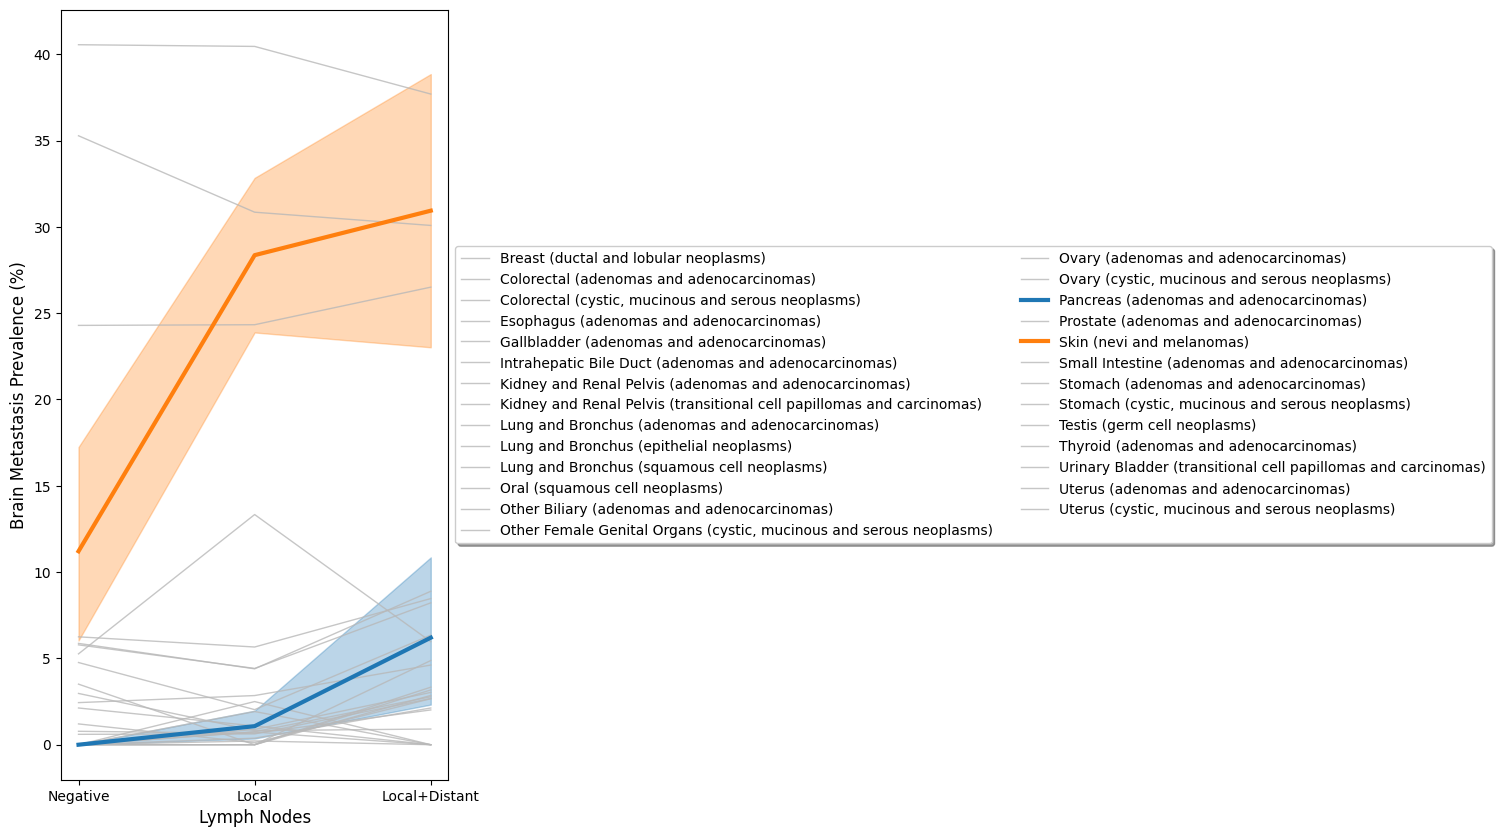

In [37]:
### PLOTTING ###
def is_thicc(feat: str, pframe: pd.DataFrame) -> bool:
    neg_cilow = pframe[(pframe[FEATURE]==feat) & (pframe['label']=='negative')]['prop_low'].values[0]
    neg_cihigh = pframe[(pframe[FEATURE]==feat) & (pframe['label']=='negative')]['prop_high'].values[0]
    locdis_cilow = pframe[(pframe[FEATURE]==feat) & (pframe['label']=='local+distant')]['prop_low'].values[0]
    locdis_cihigh = pframe[(pframe[FEATURE]==feat) & (pframe['label']=='local+distant')]['prop_high'].values[0]
    if locdis_cilow > neg_cihigh+1:
        return True 
    elif locdis_cihigh < neg_cilow-1:
        return True 
    return False

thickfeats = []
for feat in VALID_FEATURES:
    if is_thicc(feat, pframe):
        thickfeats.append(feat)

from matplotlib import colormaps
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from matplotlib.colors import rgb2hex
import colorsys
from typing import Tuple
from collections import defaultdict

def lighten_color(rgb: Tuple, amount: float=0.4) -> Tuple:
    hls = colorsys.rgb_to_hls(*rgb)
    hls = (hls[0], min(hls[1]+amount, 0.95), hls[2])
    rgb_lightened = colorsys.hls_to_rgb(*hls)
    # print()
    # print(rgb)
    # print(hls)
    # print(rgb_lightened)
    return rgb_lightened

cmap = colormaps.get_cmap('tab10')
palette = defaultdict(dict)
i = 0
for feat in VALID_FEATURES:
    if feat in thickfeats:
        rgb = cmap(i)[:3]
        i += 1
    else:
        rgb = (184/255, 184/255, 184/255) # this is grey
    palette[feat]['line'] = rgb2hex(rgb)
    palette[feat]['band'] = rgb2hex(lighten_color(rgb))

fig, ax = plt.subplots(figsize=(5, 10))
pframe = pframe.sort_values('label_idx')
for feat in VALID_FEATURES:
    dfslice = pframe[pframe[FEATURE]==feat]
    xvals = dfslice['label_idx'].to_list()
    
    est = dfslice['prop_est'].to_list()
    ci_low = dfslice['prop_low'].to_list()
    ci_high = dfslice['prop_high'].to_list()
    
    # est = gaussian_filter1d(est, sigma=0.6)
    # ci_low = gaussian_filter1d(ci_low, sigma=0.6)
    # ci_high = gaussian_filter1d(ci_high, sigma=0.6)

    if feat in thickfeats:
        line_zorder = 4
        band_zorder = 2
        line_width = 3
        line_alpha = 1
        band_alpha = 0.3
    else:
        line_zorder = 3
        band_zorder = 1
        line_width = 1
        line_alpha = 0.8
        band_alpha = 0.05

    # ax.plot(xvals, est, color=palette[feat]['line'], linestyle='-', label=feat, linewidth=line_width, zorder=line_zorder)
    # # if feat in thickfeats:
    # ax.fill_between(xvals, ci_low, ci_high, color=palette[feat]['band'], zorder=band_zorder)
    
    ax.plot(xvals, est, color=palette[feat]['line'], linestyle='-', label=feat, alpha=line_alpha, linewidth=line_width, zorder=line_zorder)
    if feat in thickfeats:
        ax.fill_between(xvals, ci_low, ci_high, color=palette[feat]['line'], alpha=band_alpha, zorder=band_zorder)

# OUTFILE = '/home/grace/work/SEER/outputs/figure2a_clin.png'
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, fancybox=True, shadow=True)
ax.set_ylabel('Brain Metastasis Prevalence (%)', fontsize=12)
ax.set_xlabel('Lymph Nodes', fontsize=12)
ax.set_xticks([1, 2, 3], ['Negative', 'Local', 'Local+Distant'])
# plt.savefig(OUTFILE)
plt.show()

# ax.set_yscale('log')
# yticks = [1, 2, 4, 8, 16, 32]
# ylabels = [f"{x}%" for x in yticks]
# ax.set_yticks(yticks, ylabels)
# plt.tight_layout()


In [107]:
### SELECT WHICH FEATURES SHOULD BE HIGHLIGHTED ###
pivot = pframe.pivot(index=FEATURE, columns='label', values=PREVALENCE)
pivot = pivot[labels]
pivot
# pframe = pframe.set_index(FEATURE)
# sframe = pd.DataFrame(index=pframe.index)
# sframe['negative_cases'] = pframe[pframe['label']=='negative']['cases']
# sframe['local_cases'] = pframe[pframe['label']=='local']['cases']
# sframe['distant_cases'] = pframe[pframe['label']=='distant']['cases']
# pframe = pframe.reset_index()
# print()
# print(sframe)
# sframe['diff'] = abs((sframe['distant']/sframe['negative']))

# def is_thicc(row: pd.Series) -> bool:
#     if row['diff'] >= 1.7 or row['diff'] <= 0.7:
#         if row['negative'] > 5 or row['distant'] > 5:
#             return True 
#     return False

# sframe['thicc'] = sframe.apply(is_thicc, axis=1)
# thicc_feats = sorted(list(sframe[sframe['thicc']==True].index.unique()))
# print()
# print(thicc_feats)
# sframe.head()

label,negative,local,local+distant
cancer_group,,,
Breast,6.324,4.787,9.650
Colorectal,0.705,0.671,2.064
Kidney and Renal Pelvis,5.324,5.100,6.695
Lung and Bronchus,34.882,34.753,33.351
Ovary,0.196,0.692,0.483
Pancreas,0.258,1.055,7.143
Prostate,1.117,0.575,2.804
Skin,11.024,25.439,30.201
Stomach,1.676,0.766,1.299


In [ ]:
### SUBFIGURE A&C: STATS ###
from util_funcs import calculate_prevalence
from util_funcs import calculate_relrisk
from util_funcs import select_valid

PREVALENCE = 'prevalence (%)'
RESPONSE = 'brain_met'
MIN_RECORDS = 5000
SEC_FEATURES = {'brain_met'}
SEC_MINCOUNT = 20

# subset main table to just those with Metastasis site field True
table = maintable[maintable['any_met']=='YES']


(24, 5)

                              hist_group cases  prevalence (%)    label  label_idx
0           adenomas and adenocarcinomas  2330          10.149  distant          3
1  cystic, mucinous and serous neoplasms    68           3.200  distant          3
2           ductal and lobular neoplasms   370          10.914  distant          3
3                   epithelial neoplasms  1246          20.561  distant          3
4                     nevi and melanomas   353          37.673  distant          3

                                     hist_group cases  prevalence (%)     label  label_idx
19                         epithelial neoplasms   115          24.008  negative          1
20                           nevi and melanomas    16          13.223  negative          1
21                nhl - mature b-cell lymphomas     0           0.000  negative          1
22                      squamous cell neoplasms    79          18.945  negative          1
23  transitional cell papillomas and 

In [57]:
PREVALENCE = 'prevalence (%)'
pframe = pframe.set_index(FEATURE)
sframe = pd.DataFrame(index=pframe.index)
sframe['negative'] = pframe[pframe['label']=='negative'][PREVALENCE]
sframe['local'] = pframe[pframe['label']=='local'][PREVALENCE]
sframe['distant'] = pframe[pframe['label']=='distant'][PREVALENCE]
sframe['negative_cases'] = pframe[pframe['label']=='negative']['cases']
sframe['local_cases'] = pframe[pframe['label']=='local']['cases']
sframe['distant_cases'] = pframe[pframe['label']=='distant']['cases']
pframe = pframe.reset_index()
print()
print(sframe)
sframe['diff'] = abs((sframe['distant']/sframe['negative']))

def is_thicc(row: pd.Series) -> bool:
    if row['diff'] >= 1.7 or row['diff'] <= 0.7:
        if row['negative'] > 5 or row['distant'] > 5:
            return True 
    return False

sframe['thicc'] = sframe.apply(is_thicc, axis=1)
thicc_feats = sorted(list(sframe[sframe['thicc']==True].index.unique()))
print()
print(thicc_feats)
sframe.head()


                                             negative  local  distant negative_cases local_cases distant_cases
hist_group                                                                                                    
adenomas and adenocarcinomas                    6.199 11.396   10.149            348        1852          2330
cystic, mucinous and serous neoplasms           0.219  1.568    3.200              3          32            68
ductal and lobular neoplasms                    5.395  4.312   10.914             28         189           370
epithelial neoplasms                           24.008 27.100   20.561            115        1097          1246
nevi and melanomas                             13.223 27.512   37.673             16         115           353
nhl - mature b-cell lymphomas                   0.000  0.000    8.108              0           0             9
squamous cell neoplasms                        18.945 15.817   10.084             79         276           239


,negative,local,distant,negative_cases,local_cases,distant_cases,diff,thicc
hist_group,,,,,,,,
adenomas and adenocarcinomas,6.199,11.396,10.149,348,1852,2330,1.637,False
"cystic, mucinous and serous neoplasms",0.219,1.568,3.200,3,32,68,14.603,False
ductal and lobular neoplasms,5.395,4.312,10.914,28,189,370,2.023,True
epithelial neoplasms,24.008,27.100,20.561,115,1097,1246,0.856,False
nevi and melanomas,13.223,27.512,37.673,16,115,353,2.849,True


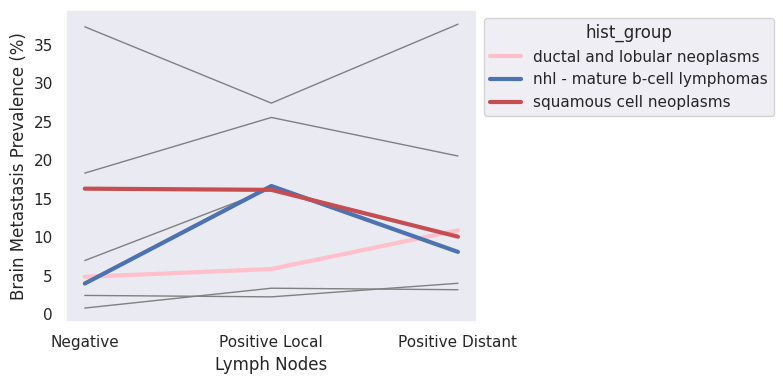

In [ ]:
sns.set_theme(style="dark")
palette = {feat: 'grey' for feat in pframe[FEATURE].unique()}
colors = ['pink', 'b', 'r', 'g']
assert len(colors) >= len(thicc_feats)
for feat, color in zip(thicc_feats, colors):
    palette[feat] = color

fig, ax = plt.subplots(figsize=(8, 4))
# g = sns.lineplot(
#     data=pframe, x="label_idx", y=VALUE, hue=FEATURE, 
#     estimator=None, color=".7", linewidth=1, ax=ax, legend=True
# )
g = sns.lineplot(
    data=pframe[~pframe[FEATURE].isin(thicc_feats)], x="label_idx", y=PREVALENCE, hue=FEATURE, palette=palette,
    estimator=None, color=".7", linewidth=1, ax=ax, legend=False
)
sns.lineplot(
    data=pframe[pframe[FEATURE].isin(thicc_feats)], x="label_idx", y=PREVALENCE, hue=FEATURE, palette=palette,
    estimator=None, color=".7", linewidth=3, ax=ax, legend=True
)
ax.set_ylabel('Brain Metastasis Prevalence (%)')
ax.set_xlabel('Lymph Nodes')
ax.set_xticks([1, 2, 3], ['Negative', 'Positive Local', 'Positive Distant'])
sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
OUTFILE = '/home/grace/work/SEER/outputs/figure2c_path.png'
plt.tight_layout()
plt.savefig(OUTFILE)

### DEPRECATED

In [ ]:

# def _format_ln_label(row: pd.Series) -> str:
#     if row['local_ln'] == False and row['distant_ln'] == False:
#         return 'negative'
#     if row['local_ln'] == True and row['distant_ln'] == False:
#         return 'local'
#     if row['local_ln'] == True and row['distant_ln'] == True:
#         return 'local+distant'
#     if row['local_ln'] == False and row['distant_ln'] == True:
#         return 'distant'
#     return 'NA'

# clin = maintable[[FEATURE, 'NSTAGE_STD', 'regional_nodes', 'local_ln', 'distant_ln']].copy()
# clin = format_ln_status(clin, basis='clinical')
# clin['ln_status'] = clin.apply(_format_ln_label, axis=1)

# path = maintable[[FEATURE, 'NSTAGE_STD', 'regional_nodes', 'local_ln', 'distant_ln']].copy()
# path = format_ln_status(path, basis='pathological')
# path['ln_status'] = path.apply(_format_ln_label, axis=1)

# clin = clin[clin[FEATURE].isin(VALID_FEATURES)]
# path = path[path[FEATURE].isin(VALID_FEATURES)]
# print('\nCLINICAL')
# print(clin[clin['ln_status']!='NA'].groupby([FEATURE])['ln_status'].value_counts().unstack().fillna(0).astype(int))
# print('\nPATHOLOGICAL')
# print(path[path['ln_status']!='NA'].groupby([FEATURE])['ln_status'].value_counts().unstack().fillna(0).astype(int))


In [ ]:

from typing import Optional

### CALCULATING PREVALENCE ###
def calculate_feature_prevalences(df: pd.DataFrame, gfield: str):
    prev_tables = []
    case_tables = []
    for fval in FEATVALS:
        print()
        print(f'{FEATURE} == "{fval}"')
        ftable = pd.DataFrame(index=sorted(df[gfield].unique()), columns=RESPONSES)
        fcounts = pd.DataFrame(index=sorted(df[gfield].unique()), columns=RESPONSES)
        for rfield in RESPONSES:
            rtable = df[df[FEATURE]==fval]
            rtable = rtable.dropna(subset=[rfield]).groupby([gfield, rfield]).size().unstack()
            if 'YES' not in rtable:
                rtable['YES'] = np.nan
            if 'NO' not in rtable:
                rtable['NO'] = np.nan
            rtable['prevalence'] = 100 * rtable['YES'] / (rtable['YES'] + rtable['NO'])
            rtable['odds'] = rtable['YES'] / rtable['NO']
            fcounts[rfield] = rtable['YES']
            
            mask1 = rtable['YES'] + rtable['NO'] >= MIN_CASES
            mask2 = rtable['YES'] >= MIN_POSITIVE
            mask = mask1 & mask2
            rtable[~mask] = np.nan
        
            ftable[rfield] = rtable['prevalence']
        
        prev_tables.append(ftable)
        case_tables.append(fcounts)
    return prev_tables, case_tables


In [ ]:

### FILTERING ###
def postprocess_feature_prevalences(prev_tables: list[pd.DataFrame], case_tables: list[pd.DataFrame], gfield: str, do_filter: bool=True):
    idx = FEATVALS.index('positive local+distant')
    primary_table = prev_tables[idx]
    # print(primary_table)
    gvals_ordered = primary_table.sort_values('any_met', ascending=False).index.to_list()

    if do_filter:
        filt_table = pd.DataFrame(index=gvals_ordered, columns=FEATVALS)
        for fval, ptable in zip(FEATVALS, prev_tables):
            filt_table[fval] = ptable.isna().sum(axis=1) <= 2
        filt_table['VALID'] = filt_table.sum(axis=1) >= 2

        mask1 = filt_table['VALID'] == False
        mask2 = primary_table.isna().all(axis=1)
        mask = mask1 | mask2
        invalid_groups = filt_table[mask].index.to_list()
        valid_groups = set(gvals_ordered) - set(invalid_groups)
    else:
        valid_groups = set(gvals_ordered)

    filt_prevs = []
    filt_cases = []
    for ptable, ctable in zip(prev_tables, case_tables):
        # sorting 
        ptable = ptable.reindex(gvals_ordered)
        ctable = ctable.reindex(gvals_ordered)
        # removing invalid groups
        ptable = ptable[ptable.index.isin(list(valid_groups))]
        ctable = ctable[ctable.index.isin(list(valid_groups))]
        filt_prevs.append(ptable)
        filt_cases.append(ctable)

    return filt_prevs, filt_cases

In [ ]:

import os 
import matplotlib
from scipy.spatial.distance import pdist, squareform


def plot_prevalence_heatmaps(
    featurevals: list[str], 
    prev_tables: list[pd.DataFrame], 
    case_tables: list[pd.DataFrame], 
    name: str,
    cluster: bool=False
    ) -> None:
    assert len(featurevals) == len(prev_tables)
    assert len(case_tables) == len(prev_tables)
    assert featurevals[-1] == 'positive local+distant'

    naxes = 3
    ntables = len(featurevals)
    widths = [4, 0.5, 1] * ntables
    ngroups = prev_tables[0].shape[0]
    fig, axes = plt.subplots(nrows=1, ncols=ntables * naxes, figsize=(ntables * 6, (ngroups/3)+4), sharey=True, width_ratios=widths)
    # cbar_ax = fig.add_axes([.91, .3, .03, .4])
    offset = 0.5       

    if cluster:
        prev_t = prev_tables[-1]
        mask = prev_t.isna()
        prev_t = prev_t.fillna(0)
        # plot clustermap for normalised pivot table to allow clustering
        cm = sns.clustermap(
            prev_t.drop(columns=['any_met']), 
            col_cluster=False , 
            row_cluster=True, 
            metric="euclidean",
            square=True,
            standard_scale=0,
        )
        plt.plot()
        plt.close()

        # get row/col order from clustermap
        rowinds = cm.dendrogram_row.reordered_ind
        rowlabels = [prev_t.index[idx] for idx in rowinds]
        
        # restore na values 
        prev_t[mask] = np.nan

    else:
        rowlabels = prev_tables[-1].index.names 

    # heatmaps
    for i, (fval, prev_t, case_t) in enumerate(zip(featurevals, prev_tables, case_tables)):
        tend1D = pd.DataFrame(index=prev_t.index)
        tend1D['p( brain_met | any_met )'] = prev_t['brain_met'].div(prev_t['any_met'])

        # reorder rows & cols correct conformation in tables
        prev_t = prev_t.loc[rowlabels]
        case_t = case_t.loc[rowlabels]
        tend1D = tend1D.loc[rowlabels]
        print()
        print(prev_t.head())
        print(case_t.head())
        print(tend1D.head())

        p_mask = prev_t.isna()
        t_mask = tend1D.isna()
        prev_t = prev_t.fillna(0)
        tend1D = tend1D.fillna(0)


        # print(tend1D)
        # sns.heatmap(prev_t, annot=True, mask=mask, cmap=matplotlib.cm.Spectral_r, vmin=0, vmax=100, cbar=False, ax=axes[i*naxes])
        sns.heatmap(prev_t, annot=True, fmt='.2f', mask=p_mask, cmap='rocket_r', vmin=0, vmax=100, cbar=False, ax=axes[i*naxes])
        sns.heatmap(tend1D, annot=True, fmt='.2f', mask=t_mask, cmap='PiYG', vmin=-0.5, cbar=False, vmax=0.5, ax=axes[i*naxes+1])
        sns.heatmap(case_t, annot=False, cmap='Blues', cbar=False, ax=axes[i*naxes+2])

        axes[i*naxes].set_title(fval)
        for y, rlabel in enumerate(prev_t.index): 
            for x, clabel in enumerate(prev_t.columns):
                if p_mask.loc[rlabel, clabel]:
                    axes[i*naxes].text(x+0.5, y+0.5, 'x', va="center", ha="center", color='grey', fontsize='medium')
                else:
                    prev = prev_t.loc[rlabel, clabel]
                    cases = int(case_t.loc[rlabel, clabel])
                    color = 'white' if prev >= 40 else 'black'
                    axes[i*naxes].text(x+0.5, y+0.8, cases, va="center", ha="center", color=color, fontsize='x-small')

        for y, truth in enumerate(tend1D.isna()['p( brain_met | any_met )']):
            if truth:
                axes[i*naxes+1].text(0.5, y+0.5, 'x', va="center", ha="center", color='grey', fontsize='medium')

    # labels 
    for ax in axes.flat:
        ax.set_ylabel('')
        ax.set_xlabel('')

    # xticks
    for ax in axes.flat:
        ax.tick_params(left=False, bottom=True, top=True, labelbottom=True, labeltop=True)
        # spines
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(True)
    
    for i, ax in enumerate(axes.flat): 
        if i % 3 == 0:
            ax.set_facecolor("white")
            ax.set_xticks([x+0.5 for x in [0, 1, 2, 3, 4, 5]])
            ax.set_xticklabels(RESPONSES, rotation=90)
        elif i % 3 == 1:
            ax.set_xticks([])
            ax.set_title('p( brain_met | any_met )', rotation=90)
        elif i % 3 == 2:
            ax.set_xticks([])
            ax.set_title('Case Load', rotation=90)

    plt.savefig(f'/home/grace/work/SEER/outputs/trajectories/{name}.png', bbox_inches="tight")
    plt.show()



In [ ]:
VALID_CANCER_GROUPS = {
    'Lung and Bronchus',
    'Skin',
    'Esophagus', 
    'Breast', 
    'Prostate',
    'Thyroid', 
    'Kidney and Renal Pelvis',
    'Pancreas',
    'Colorectal', 
    'Stomach', 
    'Liver'  # bundle the other 'hepatic' groups? 
}

GROUPS = 'cancer_group:hist_cateogry'
FILENAME = 'cancerGroup_histCateogry_clust'
temp = df[df[FEATURE].isin(VALID_CANCER_GROUPS)]
temp = temp[~(temp[GROUPS].str.contains('unspecified'))]
prev_tables, case_tables = calculate_feature_prevalences(temp, gfield=GROUPS)
filt_prevs, filt_cases = postprocess_feature_prevalences(prev_tables, case_tables, gfield=GROUPS, do_filter=True)
# plot_prevalence_heatmaps(FEATVALS[:-1], filt_prevs[:-1], filt_cases[:-1], cluster=True, name=FILENAME)


In [ ]:
filt_prevs[:-1]

In [ ]:
import math 
from copy import deepcopy

def plot_distance(prev_table: pd.DataFrame) -> None:
    # table = prev_table.drop(columns=['any_met'])
    table = deepcopy(prev_table)
    trows = prev_table.shape[1] - 1

    def _euclidean_distance(row1, row2):
        return np.sqrt(np.sum([(a-b)**2 for a, b in zip(row1, row2)]))
    
    distmat = pd.DataFrame(index=prev_table.index, columns=prev_table.index, dtype=float)
    for idx1, row1 in table.iterrows():
        valid_fields1 = set(row1[~(row1.isna())].keys())
        for idx2, row2 in table.iterrows():
            valid_fields2 = set(row2[~(row2.isna())].keys())
            fields = sorted(list(valid_fields1 & valid_fields2))
            vec1 = row1[fields]
            vec2 = row2[fields]
            vec1_std = vec1.div(vec1.max())
            vec2_std = vec2.div(vec2.max())
            vec1_std = vec1_std.drop('any_met')
            vec2_std = vec2_std.drop('any_met')
            # print()
            # print(f'[{row1.name}]\t[{row2.name}]')
            # print(fields)
            # print(vec1)
            # print(vec1_std)
            # print(vec2)
            # print(vec2_std)
            dist = _euclidean_distance(vec1_std, vec2_std)
            dist_norm = math.sqrt((trows/len(fields)) * (dist**2))
            distmat.loc[row1.name, row2.name] = float(dist_norm)

    # for col in table.columns:
    #     avgval = table[col].mean()
    #     mask = table[col].isna()
    #     table[mask] = avgval
    # print(table)

    # dist = pdist(table, metric='euclidean')
    # dist = squareform(dist)
    # distmat = pd.DataFrame(dist, index=prev_table.index, columns=prev_table.index)

    sns.clustermap(
        distmat,
        col_cluster=True, 
        row_cluster=True, 
        metric="euclidean",
        square=True,
        cmap='rocket_r'
    )

    # sns.heatmap(distmat, cmap="mako")
    # plt.plot()
    # plt.show()

plot_distance(filt_prevs[2])

In [ ]:
### FILTERING ###
idx = FEATVALS.index('positive local+distant')
primary_table = tables[idx]
gvals_ordered = primary_table.sort_values('any_met', ascending=False).index.to_list()
# print(gvals_ordered)

filt_table = pd.DataFrame(index=sorted(df[GROUP].unique()), columns=FEATVALS)
for fval, ptable in zip(FEATVALS, tables):
    filt_table[fval] = ptable.isna().sum(axis=1) <= 2
filt_table['VALID'] = filt_table.sum(axis=1) >= 2

mask1 = filt_table['VALID'] == False
mask2 = primary_table.isna().all(axis=1)
mask = mask1 | mask2
# print(mask1.head(10))
# print()
# print(mask2.head(10))
# print()
# print(mask.head(10))
# print()

invalid_groups = filt_table[mask].index.to_list()
print(invalid_groups)
print()

risk_tables = []
count_tables = []
for ptable, case_tables in zip(tables, counts):
    ptable = ptable.reindex(gvals_ordered)
    ptable = ptable.drop(invalid_groups, axis=0)
    case_tables = case_tables.reindex(gvals_ordered)
    case_tables = case_tables.drop(invalid_groups, axis=0)
    # print()
    # print(fval)
    # print(table.shape)
    # print(table.head(10))
    risk_tables.append(ptable)
    count_tables.append(case_tables)


In [ ]:
### plotting ###


In [ ]:
for fval, ptable in zip(FEATVALS, final_tables):
    print()
    print(fval)
    print(ptable.head(10))

In [ ]:
# print(maintable.sort_values('any_met', ascending=False))

In [ ]:
temp = df['hist_cateogry'].value_counts(dropna=False).sort_index().reset_index()
# temp[temp['hist_cateogry'].str.contains('epithelial')]
temp[temp['hist_cateogry'].str.contains('lobular')]
# temp
# for cat in sorted(df['hist_cateogry'].unique()):
#     print(cat)
# df['distant_ln'].value_counts(dropna=False)

In [ ]:
rtable = df.dropna(subset=['distant_ln', 'lung_met']).groupby([FEATURE, 'distant_ln', 'lung_met']).size().unstack()
rtable['prevalence'] = 100 * rtable['YES'] / (rtable['YES'] + rtable['NO'])
rtable['odds'] = rtable['YES'] / rtable['NO']

mask1 = rtable.groupby(level=0)['YES'].sum() + rtable.groupby(level=0)['NO'].sum() >= 5000
mask2 = rtable.groupby(level=0)['YES'].sum() >= 25
mask = mask1 | mask2
invalid_groups = mask[mask==False].index.to_list()
rtable = rtable.drop(invalid_groups, axis=0)
rtable

In [ ]:
df['cancer_group:hist_cateogry'] = df[[FEATURE, 'hist_cateogry']].agg(':'.join, axis=1)

ptable = df.dropna(subset=['distant_ln', 'brain_met']).groupby(['cancer_group:hist_cateogry', 'distant_ln', 'brain_met']).size().unstack()
ptable['prevalence'] = 100 * ptable['YES'] / (ptable['YES'] + ptable['NO'])
ptable['odds'] = ptable['YES'] / ptable['NO']

mask1 = ptable.groupby(level=0)['YES'].sum() + ptable.groupby(level=0)['NO'].sum() >= 5000
mask2 = ptable.groupby(level=0)['YES'].sum() >= 25
mask = mask1 & mask2
invalid_groups = mask[mask==False].index.to_list()
ptable = ptable.drop(invalid_groups, axis=0)
table_r = ptable.reset_index(level=1)

table_p = table_r.pivot(columns='distant_ln', values='prevalence')
table_p.columns = ['False', 'True']
table_p['relrisk'] = table_p['True'].div(table_p['False'])
table_p.sort_values(by='relrisk', ascending=False)

# table_p = table_r.pivot(columns='distant_ln', values='odds')
# table_p.columns = ['False', 'True']
# table_p['odds_ratio'] = table_p['True'].div(table_p['False'])
# table_p.sort_values(by='odds_ratio', ascending=False)


In [ ]:
for rfield in RESPONSES:
        rtable = df[]
        rtable = df.dropna(subset=['distant_ln', rfield]).groupby([FEATURE, 'distant_ln', rfield]).size().unstack()
        rtable['prevalence'] = 100 * rtable['YES'] / (rtable['YES'] + rtable['NO'])
        rtable['odds'] = rtable['YES'] / rtable['NO']
        table_r = rtable.reset_index(level=1)
        table_r = table_r[table_r['distant_ln']==True]

        mask1 = table_r['YES'] + table_r['NO'] >= 1000
        mask2 = table_r['YES'] >= 25
        mask = mask1 & mask2
        invalid_groups = mask[mask==False].index.to_list()
        table_r = table_r.drop(invalid_groups, axis=0)
        print()
        print(table_r.sort_values('prevalence', ascending=False))